# Análisis exploratorio del dataset "Chicago crimes-2018"

## Librerias

In [2]:
from math import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import datetime

## Conjunto de datos

In [3]:
crimesDf= pd.read_csv('Crimes_-_2018.csv')

### Escaneo de datos

In [4]:
crimesDf.shape

(268613, 22)

In [5]:
crimesDf.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.686130e+05,268613.000000,268613.000000,268609.000000,268613.000000,2.634660e+05,2.634660e+05,268613.0,263466.000000,263466.000000
mean,1.135520e+07,1142.595854,11.197924,23.444114,36.481462,1.165006e+06,1.886592e+06,2018.0,41.844398,-87.669986
std,5.439097e+05,696.116306,6.953821,14.086342,21.457227,1.603773e+04,3.118475e+04,0.0,0.085756,0.058391
min,2.375700e+04,111.000000,1.000000,1.000000,1.000000,1.092706e+06,1.813897e+06,2018.0,41.644590,-87.934273
25%,1.128706e+07,611.000000,6.000000,10.000000,23.000000,1.153330e+06,1.859421e+06,2018.0,41.769662,-87.712395
50%,1.137690e+07,1031.000000,10.000000,24.000000,32.000000,1.166911e+06,1.894240e+06,2018.0,41.865574,-87.663284
75%,1.146680e+07,1723.000000,17.000000,35.000000,53.000000,1.176459e+06,1.908737e+06,2018.0,41.905340,-87.627842
max,1.271387e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2018.0,42.022671,-87.524529


In [6]:
crimesDf.info(22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268613 entries, 0 to 268612
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    268613 non-null  int64  
 1   Case Number           268613 non-null  object 
 2   Date                  268613 non-null  object 
 3   Block                 268613 non-null  object 
 4   IUCR                  268613 non-null  object 
 5   Primary Type          268613 non-null  object 
 6   Description           268613 non-null  object 
 7   Location Description  267562 non-null  object 
 8   Arrest                268613 non-null  bool   
 9   Domestic              268613 non-null  bool   
 10  Beat                  268613 non-null  int64  
 11  District              268613 non-null  int64  
 12  Ward                  268609 non-null  float64
 13  Community Area        268613 non-null  int64  
 14  FBI Code              268613 non-null  object 
 15  

In [7]:
sns.set_style('darkgrid')

In [68]:
crimesDf.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,30.0,19,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645557,JC212685,04/01/2018 12:01:00 AM,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,6.0,44,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN


### Número de delitos distintos en la ciudad de Chicago en 2018

In [8]:
crimes = crimesDf['Primary Type'].unique()
print("The Number of distinct crimes in Chicago in the year 2018:", len(crimes))
print()
print("The Distinct Crimes are :\n", crimes)

The Number of distinct crimes in Chicago in the year 2018: 33

The Distinct Crimes are :
 ['THEFT' 'DECEPTIVE PRACTICE' 'OTHER OFFENSE' 'MOTOR VEHICLE THEFT'
 'OFFENSE INVOLVING CHILDREN' 'ASSAULT' 'LIQUOR LAW VIOLATION' 'NARCOTICS'
 'CRIMINAL DAMAGE' 'CRIM SEXUAL ASSAULT' 'BATTERY' 'BURGLARY'
 'CRIMINAL TRESPASS' 'SEX OFFENSE' 'CRIMINAL SEXUAL ASSAULT' 'ROBBERY'
 'WEAPONS VIOLATION' 'INTIMIDATION' 'PUBLIC PEACE VIOLATION' 'OBSCENITY'
 'KIDNAPPING' 'CONCEALED CARRY LICENSE VIOLATION'
 'INTERFERENCE WITH PUBLIC OFFICER' 'GAMBLING' 'STALKING' 'HOMICIDE'
 'PROSTITUTION' 'ARSON' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'PUBLIC INDECENCY' 'NON-CRIMINAL (SUBJECT SPECIFIED)'
 'OTHER NARCOTIC VIOLATION']


### VALORES FALTANTES

In [9]:
print("Numero de valores faltantes en el dataset : ", crimesDf.isna().sum().sum())

Numero de valores faltantes en el dataset :  26790


In [10]:
missing_values = list(crimesDf.isna().sum())

cols = list(crimesDf.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) 

print("Numero de valores faltantes por característica >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) 
missing_vals.head()

Numero de valores faltantes por característica >>


,Others,Location Description,Ward,X Coordinate,Y Coordinate,Latitude,Longitude,Location
Missing Values,0,1051,4,5147,5147,5147,5147,5147


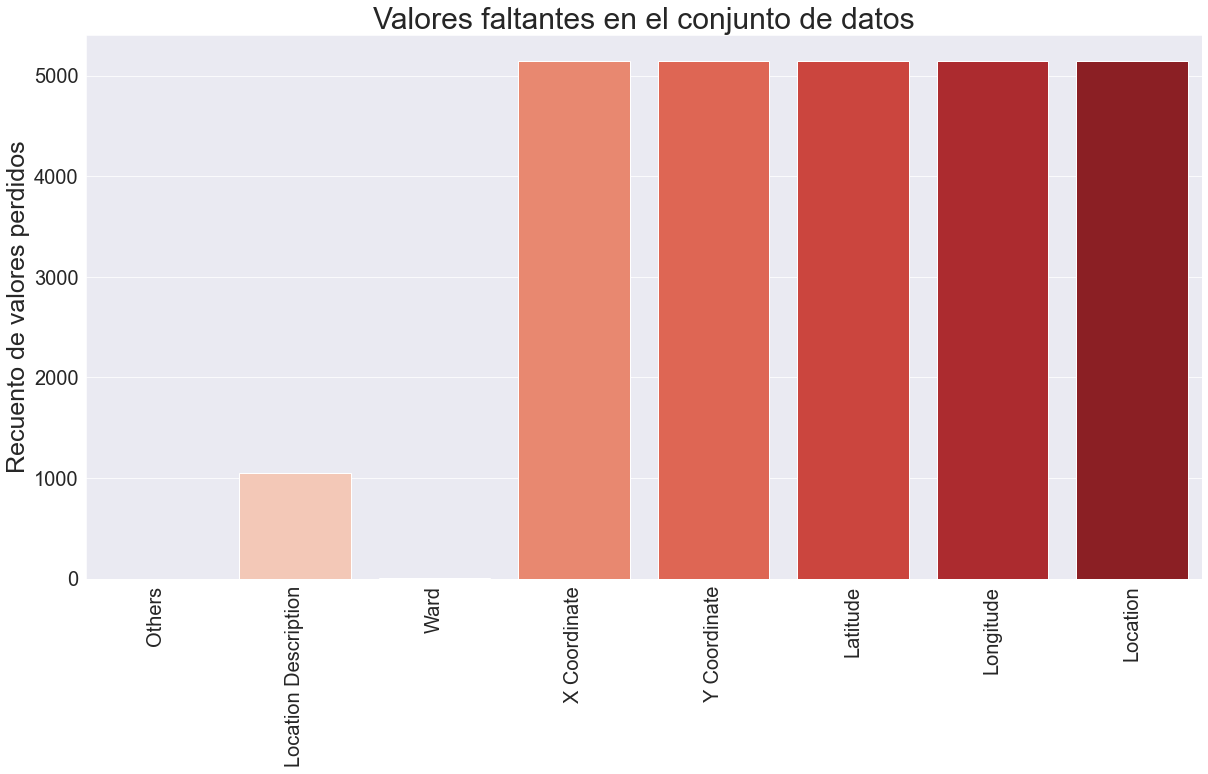

In [34]:
#cambiar tamaño de la letra de los ejes
plt.rcParams['font.size'] = 20
x = list(d.keys())
y = list(d.values())
#cambiar el tamaño
plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, palette="Reds")
plt.xticks(rotation=90)
plt.title("Valores faltantes en el conjunto de datos", fontdict = {'fontsize': 30})
plt.ylabel("Recuento de valores perdidos", fontdict={'fontsize': 25})
plt.show()

La técnica de limpieza más simple aquí sería eliminar todas las filas con al menos un valor faltante

In [178]:
df = crimesDf.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262825 entries, 152 to 268611
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    262825 non-null  int64         
 1   Case Number           262825 non-null  object        
 2   Date                  262825 non-null  datetime64[ns]
 3   Block                 262825 non-null  object        
 4   IUCR                  262825 non-null  object        
 5   Primary Type          262825 non-null  object        
 6   Description           262825 non-null  object        
 7   Location Description  262825 non-null  object        
 8   Arrest                262825 non-null  bool          
 9   Domestic              262825 non-null  bool          
 10  Beat                  262825 non-null  int64         
 11  District              262825 non-null  int64         
 12  Ward                  262825 non-null  float64       
 1

¿Cuánto de los datos se ha retenido después de esta eliminación?

In [41]:
print(round(262960 / 265698 * 100,2), "% de los datos ha sido retenidos.")

98.97 % de los datos ha sido retenidos.


Descartar las filas generalmente dará como resultado conjuntos de datos limpios y producirá datos de buen comportamiento. Pero a menudo, elimina mucha información que reduce la precisión de los resultados. Sin embargo, en nuestro caso, dado que se retiene el 98,97% de los datos y dado que prácticamente no hay otra forma de evitar el tipo de valores faltantes que tenemos, seguiremos adelante con este conjunto de datos ligeramente disminuido.

Variables continuas y categoricas

In [51]:
cont = crimesDf._get_numeric_data().columns
#variables_categoricas = list(set(crimesDf.columns) - set(cont))
#variables_continuas = list(cont)
print("Variables categoricas: ",list(set(crimesDf.columns) - set(cont)))
print("Variables continuas: ",list(cont))

Variables categoricas:  ['IUCR', 'Case Number', 'Location', 'FBI Code', 'Primary Type', 'Updated On', 'Location Description', 'Description', 'Date', 'Block']
Variables continuas:  ['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']


## DELITOS COMUNES

Principales delitos en Chicago en el año 2018


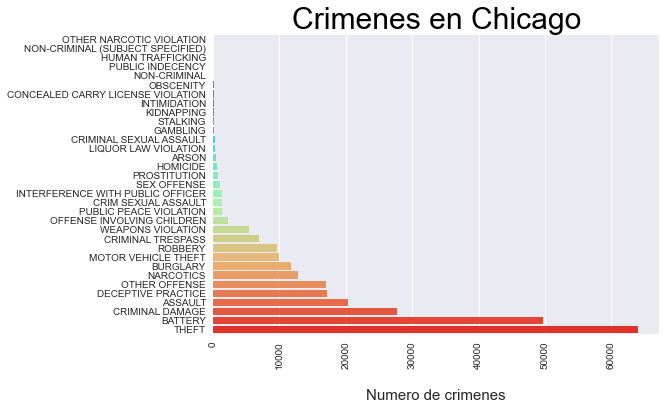

In [9]:
plt.style.use('seaborn')

top_5_crimes = df['Primary Type'].value_counts().sort_values(ascending=False).head(33)

temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head(33)
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="rainbow") #, palette="rainbow"

plt.title("Crimenes en Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nNumero de crimenes", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

### Top 5 crimenes

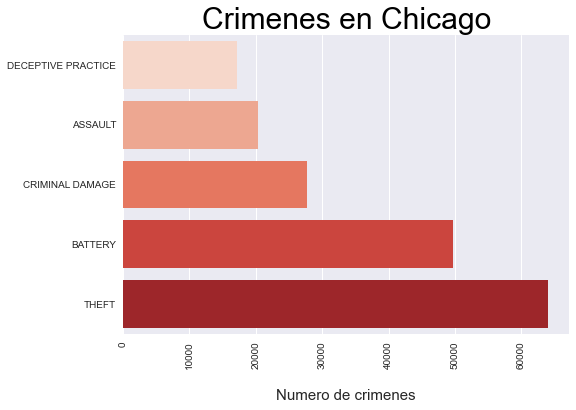

In [10]:
plt.style.use('seaborn')

top_5_crimes = df['Primary Type'].value_counts().sort_values(ascending=False).head()

temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="Reds") 
plt.title("Top 5 crimenes en Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nNumero de crimenes", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

In [11]:
temp.head()
temp.columns=['Crime','Number']
temp.index=[0,1,2,3,4]
temp['co-ordinates']=[1,2,3,4,5]
temp.head()

,Crime,Number,co-ordinates
0,DECEPTIVE PRACTICE,17221,1
1,ASSAULT,20342,2
2,CRIMINAL DAMAGE,27699,3
3,BATTERY,49713,4
4,THEFT,64024,5


In [12]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

temp_cds = ColumnDataSource(temp)

fig1 = figure(plot_width=700, plot_height=400, title="Crimenes mas frecuentes en Chicago - 2018",
             x_axis_label="Numero de crimenes", y_axis_label="Tipo de crimenes", x_range=(0, 70000))

fig1.title.align = "left"
fig1.title.text_color = "black"
fig1.title.text_font_size = "20px"

fig1.hbar(y='co-ordinates', right='Number', source=temp_cds, left=0, color='red', alpha=0.5, height=0.50)
fig1.yaxis.major_label_overrides = {5: 'Theft', 4:'Battery', 3:'Criminal Damage', 2:'Assault',
                                   1:'Deceptive Practice'}

# Adding passive interactivity
tooltips = [
    ('Number of Crimes', '@Number'),
]

#fig1.legend.location
fig1.add_tools(HoverTool(tooltips=tooltips))

output_notebook()
show(fig1)

Loading BokehJS ...

### Columna fecha

In [34]:
t = crimesDf['Date'][20]
print(t)
s1 = t[:11] 
print(s1)
s2 = t[11:]
print(s2)

print(s2)
hr = s2[:2]
mins = s2[3:5]
sec = s2[6:8]
time_frame = s2[9:]
if(time_frame == 'PM'):
    if (int(hr) != 12):
        hr = str(int(hr) + 12)
else:
    if(int(hr) == 12):
        hr = '00'

print(hr, mins, sec)

11/27/2018 08:43:00 PM
11/27/2018 
08:43:00 PM
08:43:00 PM
20 43 00


In [35]:
month = s1[:2]
date = s1[3:5]
year = s1[6:10]

final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
print(final_date)

2018-11-27 20:43:00


In [36]:
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [135]:
crimesDf['Date'] = crimesDf['Date'].apply(time_convert)

### Columna "Month"

In [136]:
def month(x):
    return x.strftime("%B")
crimesDf['Month'] = crimesDf['Date'].apply(month)

Frecuencia de los delitos más ocurridos durante el año 2018

In [137]:
theft_dict ={} # dictionary
battery_dict = {}
crim_dam = {}
assault = {}
dec_prac = {}

months = crimesDf["Month"].unique()
for month in months :
    theft_dict[month]=0
    battery_dict[month]=0
    crim_dam[month]=0
    assault[month]=0
    dec_prac[month]=0

for elem in crimesDf[crimesDf["Primary Type"]=="THEFT"]["Month"]:
    if elem in theft_dict.keys():
        theft_dict[elem] += 1

for elem in crimesDf[crimesDf["Primary Type"]=="BATTERY"]["Month"]:
    if elem in battery_dict.keys():
        battery_dict[elem] += 1
        
for elem in crimesDf[crimesDf["Primary Type"]=="CRIMINAL DAMAGE"]["Month"]:
    if elem in crim_dam.keys():
        crim_dam[elem] += 1
        
for elem in crimesDf[crimesDf["Primary Type"]=="ASSAULT"]["Month"]:
    if elem in assault.keys():
        assault[elem] += 1
        
for elem in crimesDf[crimesDf["Primary Type"]=="DECEPTIVE PRACTICE"]["Month"]:
    if elem in dec_prac.keys():
        dec_prac[elem] += 1
        
        
# Let's order the above dictionaries for proper plotting
months=['January','February','March','April','May','June','July','August','September','October','November','December']
theft_list = [(k,theft_dict[k]) for k in months]
battery_list = [(k,battery_dict[k]) for k in months]
crim_dam_list = [(k,crim_dam[k]) for k in months]
assault_list = [(k,assault[k]) for k in months]
dec_prac_list = [(k,dec_prac[k]) for k in months]

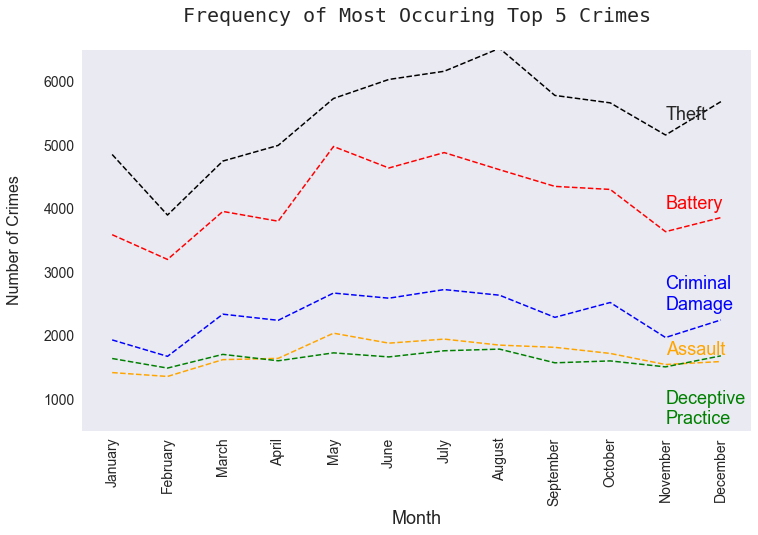

In [138]:
plt.style.use('seaborn-dark')
#sns.set(rc={'axes.facecolor':'A0D7E6', 'figure.facecolor':'ffffff'})
fig, ax = plt.subplots(figsize=(12,7))

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

# Setting the ticks only on the bottom and the left of the graph
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(500, 6500)

x = [z[0] for z in theft_list]
# print(x)
y = [z[1] for z in theft_list]
ax.plot(x,y, color="black")
ax.lines[0].set_linestyle("--")

x = [z[0] for z in battery_list]
y = [z[1] for z in battery_list]
ax.plot(x,y, color="red")
ax.lines[1].set_linestyle("--")

x = [z[0] for z in crim_dam_list]
y = [z[1] for z in crim_dam_list]
ax.plot(x,y, color="blue")
ax.lines[2].set_linestyle("--")

x = [z[0] for z in assault_list]
y = [z[1] for z in assault_list]
ax.plot(x,y, color="orange")
ax.lines[3].set_linestyle("--")

# x,y = zip(*dec_prac.items())
x = [z[0] for z in dec_prac_list]
y = [z[1] for z in dec_prac_list]
ax.plot(x,y, color="green")
ax.lines[4].set_linestyle("--")


for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.text(10,5400,"Theft",fontsize=18)
plt.text(10,4000,"Battery",fontsize=18,color="red")
plt.text(10,2400,"Criminal\nDamage",fontsize=18,color="blue")
plt.text(10,1700,"Assault",fontsize=18,color="orange")
plt.text(10,600,"Deceptive\nPractice",fontsize=18,color="green")

ax.set_title("Frequency of Most Occuring Top 5 Crimes\n",fontname="monospace", fontsize=20)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Number of Crimes\n", fontsize=16)
    
plt.show()

In [139]:
theft_df = df[df['Primary Type']=='THEFT']
battery_df = df[df['Primary Type']=='BATTERY'] 
crim_dam_df = df[df['Primary Type']=='CRIMINAL DAMAGE']
assault_df = df[df['Primary Type']=='ASSAULT']
dec_prac_df = df[df['Primary Type']=='DECEPTIVE PRACTICE']

## Arrestos en el estado de Chicago

In [140]:
l = df["Arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Porcentaje de no arrestos de todos los crimenes reportados :",false/(false+true)*100,'%')

Porcentaje de no arrestos de todos los crimenes reportados : 79.86530961666509 %


¡Esa es una probabilidad del 79.86530961666509% de evadir un arresto!

### Distribución de los arrestos a lo largo de los meses

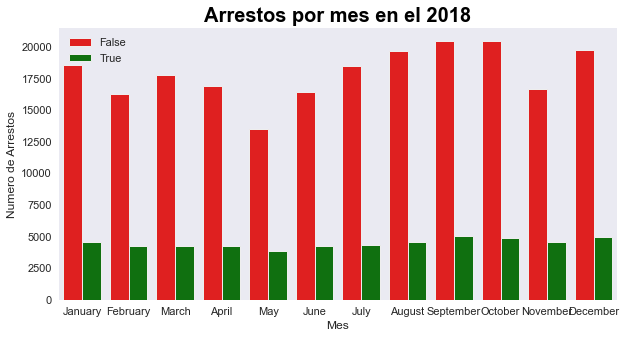

In [141]:
plt.style.use('seaborn-dark')

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x="Month", hue="Arrest", data=crimesDf[['Month','Arrest']], palette=['red','green'])
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

ax.set(title ="Arrestos por mes en el 2018", xlabel="Mes", ylabel="Numero de Arrestos", xticklabels=months)
plt.title('Arrestos por mes en el 2018', fontdict={'fontsize':20,'color':'black'}, weight='bold')
plt.legend(loc='upper left')
plt.show()


### Variación de los arrestos por tipo de crimen

In [142]:

arrest_crime = df.groupby(['Primary Type', 'Arrest']).agg({'Arrest':"count"})
arrest_crime.columns = ["Count"]
arrest_crime.head(60)

Count
Primary Type                      Arrest       
ARSON                             False     332
                                  True       41
ASSAULT                           False   16980
                                  True     3362
BATTERY                           False   39434
                                  True    10279
BURGLARY                          False   11097
                                  True      592
CONCEALED CARRY LICENSE VIOLATION False       4
                                  True      144
CRIM SEXUAL ASSAULT               False    1229
                                  True      118
CRIMINAL DAMAGE                   False   26016
                                  True     1683
CRIMINAL SEXUAL ASSAULT           False     181
                                  True       38
CRIMINAL TRESPASS                 False    3082
                                  True     3799
DECEPTIVE PRACTICE                False   16341
                                  True      880
GAMBLING                          True      201
HOMICIDE                          False     360
                                  True      241
HUMAN TRAFFICKING                 False      11
                                  True        1
INTERFERENCE WITH PUBLIC OFFICER  False      60
                                  True     1245
INTIMIDATION                      False     154
                                  True       13
KIDNAPPING                        False     164
                                  True        8
LIQUOR LAW VIOLATION              True      265
MOTOR VEHICLE THEFT               False    9390
                                  True      544
NARCOTICS                         False       6
                                  True    12790
NON-CRIMINAL                      False      34
                                  True        2
NON-CRIMINAL (SUBJECT SPECIFIED)  False       2
                                  True        1
OBSCENITY                         False      16
                                  True       68
OFFENSE INVOLVING CHILDREN        False    1863
                                  True      312
OTHER NARCOTIC VIOLATION          False       1
OTHER OFFENSE                     False   13380
                                  True     3569
PROSTITUTION                      True      717
PUBLIC INDECENCY                  True       14
PUBLIC PEACE VIOLATION            False     538
                                  True      826
ROBBERY                           False    8873
                                  True      804
SEX OFFENSE                       False     842
                                  True      211
STALKING                          False     178
                                  True       21
THEFT                             False   57696
                                  True     6328
WEAPONS VIOLATION                 False    1642

In [143]:
import math

the_crimes=['THEFT','DECEPTIVE PRACTICE','OTHER OFFENSE','MOTOR VEHICLE THEFT',
            'OFFENSE INVOLVING CHILDREN','ASSAULT','NARCOTICS',
            'CRIMINAL DAMAGE','CRIM SEXUAL ASSAULT','BATTERY','BURGLARY',
            'CRIMINAL TRESPASS','SEX OFFENSE','CRIMINAL SEXUAL ASSAULT','ROBBERY',
            'WEAPONS VIOLATION','INTIMIDATION','PUBLIC PEACE VIOLATION','OBSCENITY',
            'KIDNAPPING','CONCEALED CARRY LICENSE VIOLATION','INTERFERENCE WITH PUBLIC OFFICER',
            'STALKING','HOMICIDE','ARSON',
            'NON-CRIMINAL','HUMAN TRAFFICKING','NON-CRIMINAL (SUBJECT SPECIFIED)']

"""
the_crimes=['THEFT','DECEPTIVE PRACTICE','OTHER OFFENSE','MOTOR VEHICLE THEFT',
            'OFFENSE INVOLVING CHILDREN','ASSAULT','LIQUOR LAW VIOLATION','NARCOTICS',
            'CRIMINAL DAMAGE','CRIM SEXUAL ASSAULT','BATTERY','BURGLARY',
            'CRIMINAL TRESPASS','SEX OFFENSE','CRIMINAL SEXUAL ASSAULT','ROBBERY',
            'WEAPONS VIOLATION','INTIMIDATION','PUBLIC PEACE VIOLATION','OBSCENITY',
            'KIDNAPPING','CONCEALED CARRY LICENSE VIOLATION','INTERFERENCE WITH PUBLIC OFFICER','GAMBLING',
            'STALKING','HOMICIDE','PROSTITUTION','ARSON',
            'NON-CRIMINAL','HUMAN TRAFFICKING','PUBLIC INDECENCY','NON-CRIMINAL (SUBJECT SPECIFIED)',
            'OTHER NARCOTIC VIOLATION']
"""

# the_crimes has only the crimes we want to analyze now

# create the dataframe arrest
arrest = pd.DataFrame(columns=['Crime','True','False'])

# First, we make our dataset
for i,crime in enumerate(the_crimes):
    subset = df[df['Primary Type']==crime]
    true = subset['Arrest'].value_counts().sort_index()[1]
    false = subset['Arrest'].value_counts().sort_index()[0]
    temp_df = pd.DataFrame({'Crime':[crime], 'True':[true], 'False':[false]})
    
    arrest = arrest.append(temp_df)
    
    arrest['True_per']=arrest['True']/(arrest['True']+arrest['False'])*100
    arrest['False_per']=arrest['False']/(arrest['True']+arrest['False'])*100
    
# arrest is our dataset

# plot the dataset
def style(p):
        # Title 
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'

        # Axis titles
        p.xaxis.axis_label_text_font_size = '12pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '12pt'
        p.yaxis.axis_label_text_font_style = 'bold'

        # Tick labels
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'

        return p
    
#status = ['Arrested', 'Not Arrested']
status = ['Arrested','Not Arrested']

arrest_cds = ColumnDataSource(arrest)
crimes = arrest_cds.data['Crime'].tolist()
fig2 = figure(x_range=crimes, plot_width = 1000, plot_height = 1000, 
                title = 'Arrests vs Crime Type',
                x_axis_label = 'Arrest Status', y_axis_label = 'Number of Crimes')
fig2.vbar_stack(stackers = ['True','False'], x='Crime',width=0.25, legend=['Arrested', 'Not Arrested'], source=arrest_cds,
               color=['green','red'])
fig2.xaxis.major_label_orientation = math.pi/2

tooltips = [('Crime','@Crime'),('Arrested Percentage','@True_per'), ('Not Arrested Percentage', '@False_per')]
hover = HoverTool(tooltips=tooltips, mode='vline')

fig2.add_tools(hover)
    
#fig2=style(fig2)

output_notebook()
show(fig2)

C:\Users\aconc\AppData\Local\Temp\ipykernel_14644\4268776082.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrest = arrest.append(temp_df)
C:\Users\aconc\AppData\Local\Temp\ipykernel_14644\4268776082.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrest = arrest.append(temp_df)
C:\Users\aconc\AppData\Local\Temp\ipykernel_14644\4268776082.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrest = arrest.append(temp_df)
C:\Users\aconc\AppData\Local\Temp\ipykernel_14644\4268776082.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrest = arrest.append(temp_df)
C:\Users\aconc\AppData\Local\Temp\ipykernel_14644\4268776082

Loading BokehJS ...

## CRIMENES VS TIEMPO

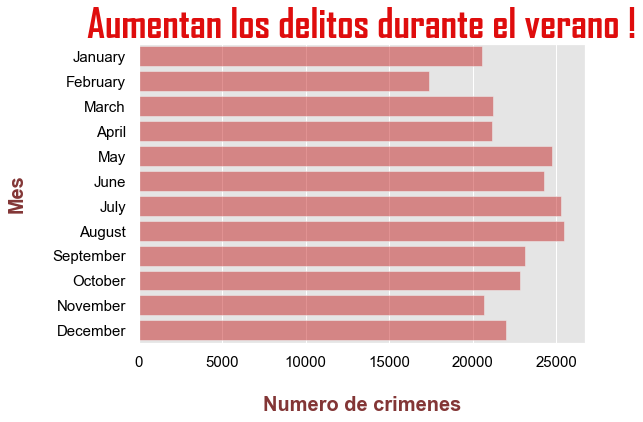

In [147]:
plt.style.use('ggplot')
sns.set_context('notebook')

sns.countplot(y='Month', data=crimesDf, palette=["#DF0D0D"], order=['January', 'February', 'March', 'April', 'May', 'June', "July", 'August', 'September', 'October', 'November', 'December'], alpha=0.5)

plt.title("Aumentan los delitos durante el verano !", fontdict={'fontsize': 40, 'color': '#DF0D0D', 'fontname':'Agency FB'}, weight="bold")
plt.ylabel("Mes\n", fontdict={'fontsize': 20}, weight="bold", color="#833636")
plt.xlabel("\nNumero de crimenes", fontdict={'fontsize': 20}, weight="bold", color="#833636")

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15, color='black')
plt.show()

Los meses de mayo, junio, julio y agosto han visto el mayor aumento en las tasas de criminalidad en la ciudad

### Columna "Hour" [24 hour format]

In [152]:
def hour(x):
    return x.strftime("%H")
crimesDf['Hour_Day'] = crimesDf['Date'].apply(hour)

Ahora podemos descubrir cuales son las horas mas inseguras

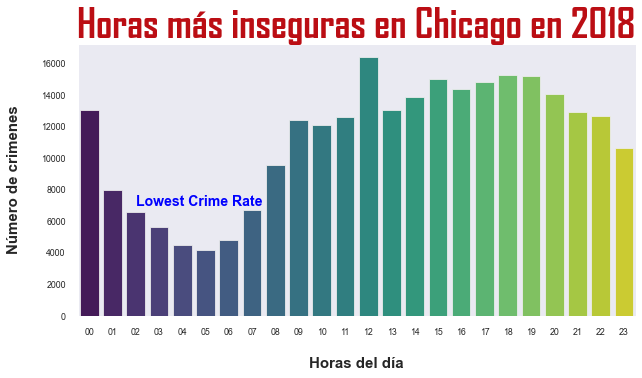

In [163]:
plt.style.use('seaborn-dark')
sns.set_context('paper')

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour_Day', data=crimesDf, palette="viridis", order=['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])

plt.title("Horas más inseguras en Chicago en 2018", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHoras del día", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Número de crimenes\n", fontdict={'fontsize': 15}, weight="bold")

plt.text(2, 7000, 'Lowest Crime Rate', fontdict={'fontsize': 14, 'color':"blue" }, weight='bold')

plt.show()

In [181]:
# Which crimes are more prone to happen in the cover of darkness ?
the_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT', 'DECEPTIVE PRACTICE','WEAPONS VIOLATION','NARCOTICS','HOMICIDE','BURGLARY','INTERFERENCE WITH PUBLIC OFFICER']
dark_hours = ['19', '20', '21', '22', '23', '00', '01', '02', '03','04','05','06','07'] # according to Chicago sun rise-set stats
crime_time = crimesDf[['Primary Type','Hour_Day']]
c = crime_time.groupby(['Primary Type'])
c.head()


#y = crime_time[crime_time['Primary Type']=='THEFT']['Hour_Day'].value_counts().sort_index()[dark_hours] # index will correspond
#x = dark_hours   
#plt.bar(x,y,width=1)

fig3 = figure(x_range=dark_hours, plot_height=500, plot_width=500, title="Does darkness aid all crime ?"+" (Hover over graph for specifics)",x_axis_label='Hour (In 24 hour format)',
             y_axis_label="Number of Crimes")
def plot_it(crime_name):
    dark_hours = ['19', '20', '21', '22', '23', '00', '01', '02', '03','04','05','06','07'] # according to Chicago sun rise-set stats   
    y = crime_time[crime_time['Primary Type']==crime_name]['Hour_Day'].value_counts().sort_index()[dark_hours]
    cr_dh = pd.DataFrame({"Hour":dark_hours, "Crimes":y})
    cr_dh_cds = ColumnDataSource(cr_dh)
    
    fig3.vbar(x='Hour', top='Crimes', source=cr_dh_cds, bottom=0, color='blue', alpha=0.75, width=0.50)

    # Adding passive interactivity
    tooltips = [
         ('Number of Crimes', '@Crimes'),
    ]

    #fig1.legend.location
    fig3.add_tools(HoverTool(tooltips=tooltips))
    
    output_notebook()
    show(fig3)

#crime_input = input("Enter the Crime for which you want to visualize the 'Fear the Dark' >> ")
#plot_it(crime_input.upper())
for crime in the_crimes:
    print(crime)
    plot_it(crime.upper())


THEFT


Loading BokehJS ...

BATTERY


Loading BokehJS ...

CRIMINAL DAMAGE


Loading BokehJS ...

ASSAULT


Loading BokehJS ...

DECEPTIVE PRACTICE


Loading BokehJS ...

WEAPONS VIOLATION


Loading BokehJS ...

NARCOTICS


Loading BokehJS ...

HOMICIDE


Loading BokehJS ...

BURGLARY


Loading BokehJS ...

INTERFERENCE WITH PUBLIC OFFICER


Loading BokehJS ...

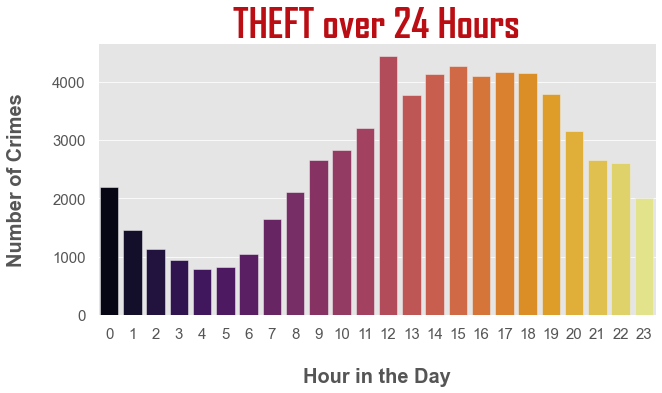

In [182]:
#sns.set_style('darkgrid')
plt.style.use('ggplot')
# An analysis of the 24 hour pattern for crimes
c = input("Enter the crime you wish to see the 24 hour pattern off >> ")

crime_df = df[df['Primary Type']==c.upper()]
hours = [int(x) for x in list(crime_df['Hour_Day'].unique())]
hours = sorted(hours)
# print(hours)

h_cri = list(crime_df['Hour_Day'].value_counts().sort_index())
# print(bur_cri)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=h_cri, palette='inferno')

# Aesthetic appeal
tit = c.upper()+" over 24 Hours"
plt.title(tit, fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 20}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 20}, weight="bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# show plot
plt.show()

c:\Users\aconc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


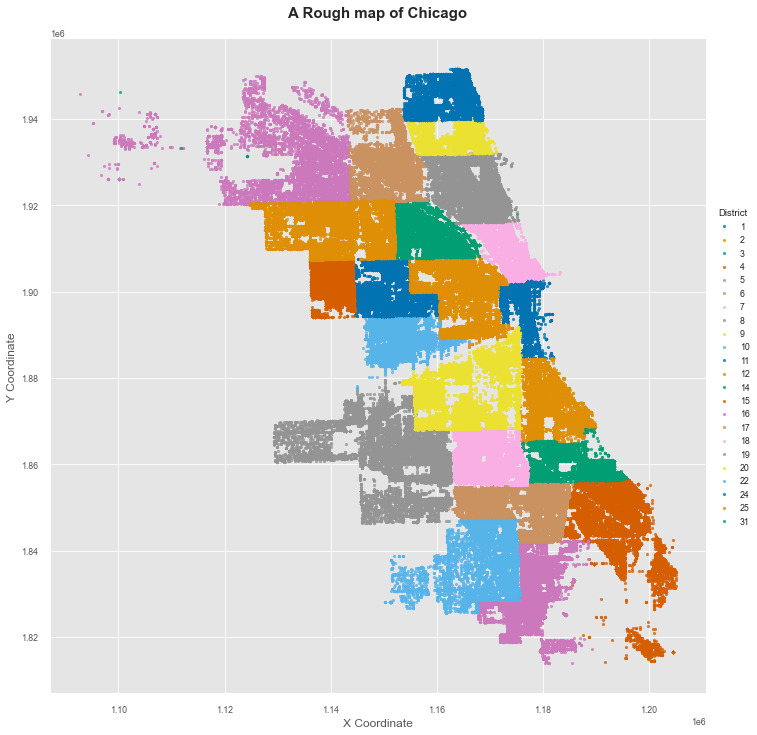

In [184]:
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df,
           fit_reg=False, 
           hue="District",
           palette='colorblind',
           height=10,
           scatter_kws={"marker": "+", 
                        "s": 10})
ax = plt.gca()
ax.set_title("A Rough map of Chicago\n", fontdict={'fontsize': 15}, weight="bold")
plt.show()